# Self-Adjusting Supply Chain Event Simulation
<br>

#### That's a long title, right? Don't be repulsed. 

This is an example of how Multivariate Hawkes Processes are applied to Supply Chain modeling. <br>
It has a natural application on financial data like the volume changes of Limited Order Books <br>
where ask volumes and bid volumes are modeled. We apply this to Supply Chain instead and simulate. <br>
If you're not familiar with Hawkes processes, try to have a look by reading up on it. <br>
But you probably want the fast and short answer and here it is.<br>
<br>
*A Hawkes process is a self-exciting temporal process.* <br>
<br>
Let's break it down:<br>

1. Base events (background rate)
  * You have regular customers who place orders naturally, like restaurants needing weekly supplies. This is your baseline.

2. Self-exciting nature
* Imagine you have a restaurant as a customer and they have good experience with your service, then they're more likely to
  * Order more frequently
  * Recommend you to other restaurants

3. Time decay
* The excitement/influence of each order gradually fades
  * Right after a positive experience, a customer might place several follow-up orders
  * Over time, they return to their normal ordering pattern
  * Think of a highly satisfied customer's enthusiasm -> it naturally settles down

4. Cascading effects
* A big order might trigger a chain reaction
  * A restaurant chain orders from you
  * Their other locations notice and start ordering
  * Local competitors see your trucks making deliveries and become interested
  * Each of these new customers can trigger their own chain of referrals

5. Practical applications
* For our use case in Supply Chain, it can help simulate the following
  * Demand spikes
  * Resource allocation
  * Inventory planning
  * Behaviour patterns 



In [ ]:
import os

import pandas as pd

from src.supplyseer.tsa.advanced.hawkes import SupplyChainData, simulate_supply_chain

In [129]:
data = SupplyChainData(
    sales_demand=[10.0, 15.0, 20.0, 25.0, 18.0, 30.0, 22.0],  # Estimated daily sales demand for 7 days
    inventory_levels=[50.0, 40.0, 30.0, 25.0, 20.0, 15.0, 10.0],  # Estimated inventory levels at the beginning of each day
    time_points=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0],  # Representing each day in the week
    max_time=7.0  # 7 days in total
)

In [130]:
data

SupplyChainData(sales_demand=[10.0, 15.0, 20.0, 25.0, 18.0, 30.0, 22.0], inventory_levels=[50.0, 40.0, 30.0, 25.0, 20.0, 15.0, 10.0], time_points=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0], max_time=7.0)

In [145]:
output = simulate_supply_chain(data)
pd.json_normalize(output["events"])

,time,event_type,location_id,magnitude,inventory_level,demand_level,timestamp
0,1.125512,EventType.DEMAND_SPIKE,0,0.340762,8.710037,0.100000,2024-10-16 14:17:14.091219
1,1.174672,EventType.INVENTORY_CHANGE,1,0.675077,11.146164,11.146164,2024-10-16 14:17:14.091290
2,2.427934,EventType.DEMAND_SPIKE,0,0.775537,7.573782,0.100000,2024-10-16 14:17:14.091359
3,2.518848,EventType.INVENTORY_CHANGE,1,0.294191,11.782247,11.782247,2024-10-16 14:17:14.091553
4,2.555407,EventType.DEMAND_SPIKE,0,0.144393,6.867260,0.100000,2024-10-16 14:17:14.091627
5,2.571431,EventType.DEMAND_SPIKE,0,0.705030,5.208254,0.100000,2024-10-16 14:17:14.091702
6,3.021345,EventType.INVENTORY_CHANGE,1,0.662676,13.301770,13.301770,2024-10-16 14:17:14.091778
7,3.248907,EventType.INVENTORY_CHANGE,1,0.667618,14.240670,14.240670,2024-10-16 14:17:14.091858
8,3.318570,EventType.DEMAND_SPIKE,0,0.513735,4.580507,0.100000,2024-10-16 14:17:14.091942
9,3.464999,EventType.INVENTORY_CHANGE,1,0.998792,15.981534,15.981534,2024-10-16 14:17:14.092029


In [168]:
df = pd.json_normalize(output["events"])
df

,time,event_type,location_id,magnitude,inventory_level,demand_level,timestamp
0,1.125512,EventType.DEMAND_SPIKE,0,0.340762,8.710037,0.100000,2024-10-16 14:17:14.091219
1,1.174672,EventType.INVENTORY_CHANGE,1,0.675077,11.146164,11.146164,2024-10-16 14:17:14.091290
2,2.427934,EventType.DEMAND_SPIKE,0,0.775537,7.573782,0.100000,2024-10-16 14:17:14.091359
3,2.518848,EventType.INVENTORY_CHANGE,1,0.294191,11.782247,11.782247,2024-10-16 14:17:14.091553
4,2.555407,EventType.DEMAND_SPIKE,0,0.144393,6.867260,0.100000,2024-10-16 14:17:14.091627
5,2.571431,EventType.DEMAND_SPIKE,0,0.705030,5.208254,0.100000,2024-10-16 14:17:14.091702
6,3.021345,EventType.INVENTORY_CHANGE,1,0.662676,13.301770,13.301770,2024-10-16 14:17:14.091778
7,3.248907,EventType.INVENTORY_CHANGE,1,0.667618,14.240670,14.240670,2024-10-16 14:17:14.091858
8,3.318570,EventType.DEMAND_SPIKE,0,0.513735,4.580507,0.100000,2024-10-16 14:17:14.091942
9,3.464999,EventType.INVENTORY_CHANGE,1,0.998792,15.981534,15.981534,2024-10-16 14:17:14.092029


In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

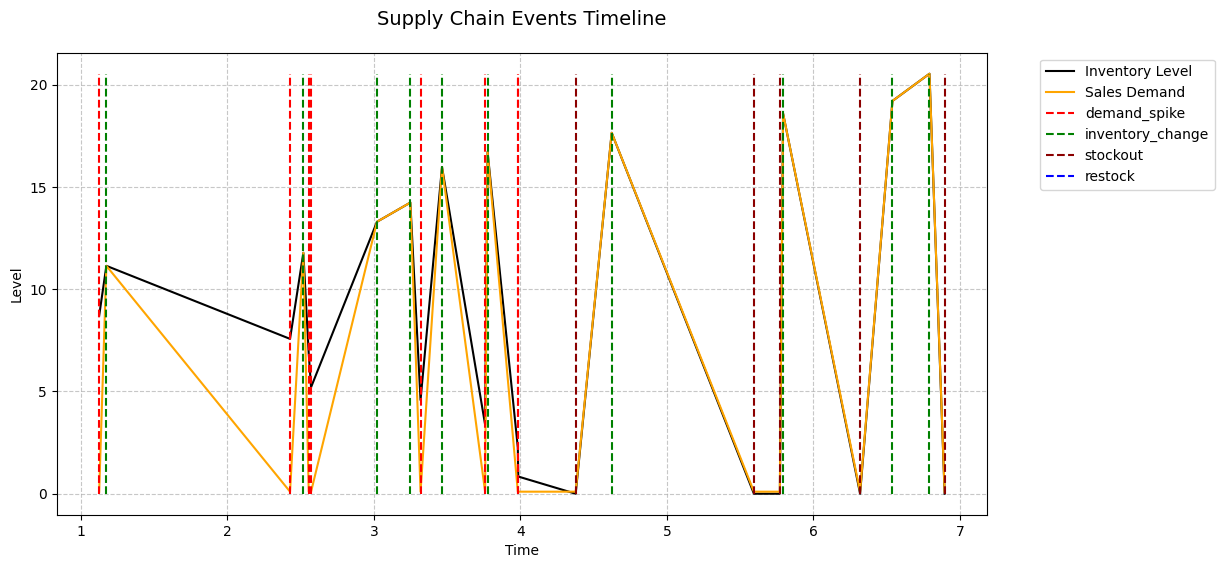

In [172]:


# Update event colors to use the actual enum values
event_colors = {
    EventType.DEMAND_SPIKE: 'red',
    EventType.INVENTORY_CHANGE: 'green',
    EventType.STOCKOUT: 'darkred',
    EventType.RESTOCK: 'blue',
}

# Plotting inventory level and demand level
plt.figure(figsize=(12, 6))

plt.plot(df["time"], df["inventory_level"], label="Inventory Level", color='black', linewidth=1.5)
plt.plot(df["time"], df["demand_level"], label="Sales Demand", color='orange', linestyle='-', linewidth=1.5)

# Plotting events
for event_type, color in event_colors.items():
    mask = df['event_type'] == event_type
    events = df[mask]
    plt.vlines(events['time'], ymin=0, ymax=df['inventory_level'].max(), 
               colors=color, linestyles='dashed', label=event_type.value)

# Set plot titles and labels
plt.title('Supply Chain Events Timeline', fontsize=14, pad=20)
plt.xlabel('Time')
plt.ylabel('Level')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
